# Comprehensive Metropolitan Analysis: Global Urban Economic Patterns & Geographic Visualization

**Multi-Dimensional Urban Economic Intelligence**: This analysis synthesizes insights from the comprehensive world development series (Parts 1-5) by focusing on metropolitan GDP patterns across key global regions. By examining economic performance through both aggregate statistical analysis and detailed geographic visualization, we develop a nuanced understanding of how urban economic power is distributed globally and concentrated within specific national contexts.

**Methodological Integration & Visual Analytics**: Building on previous analyses of economic performance, inequality, housing quality, and environmental access, this final component employs advanced geographic visualization techniques to reveal spatial patterns in metropolitan economic development. The approach combines traditional statistical analysis with coordinate-based mapping to provide both quantitative insights and intuitive geographic understanding of global urban economic hierarchies and regional development patterns.

In [15]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# load the datasets
gdp_metropol = pd.read_excel('../data/gdp_metropol.xls')
gini_disposable = pd.read_excel('../data/gini_disposable_income.xls')
urban_popu = pd.read_excel('../data/urban_living_1.xlsx')
urban_greenspace = pd.read_excel('../data/urban_living_greenspace_2.xlsx')

# only run this with the above cells, other issues present. 
# manage dataset 1
# set row 1 to column names
gdp_metropol.columns = gdp_metropol.iloc[0]
gdp_metropol = gdp_metropol[1:]

# remove last two rows
gdp_metropol = gdp_metropol[:-2]

# manage dataset 2
# set row 1 to column names
gini_disposable.columns = gini_disposable.iloc[0]
gini_disposable = gini_disposable[1:]

# remove last three rows
gini_disposable = gini_disposable[:-3]

# melt data so years are rows not columns 
gini_disposable = gini_disposable.melt(id_vars=["Country", "City/region"], var_name="Year", value_name="Gini")

# convert ".." to proper nulls, then coerce to numeric
gini_disposable = gini_disposable[gini_disposable["Gini"] != ".."]
gini_disposable["Gini"] = pd.to_numeric(gini_disposable["Gini"], errors="coerce")

# manage dataset3
# remove unwanted columns by name
urban_popu = urban_popu.drop(columns=[
    'SDG Goal',
    'SDG Target',
    'SDG Indicator',
    'Country or Territory Name',
    'Data Units',
    'Data Source',
    'Footnote'
])

# manage dataset
# remove unwanted columns by name
urban_greenspace = urban_greenspace.drop(columns=[
    'SDG Goal',
    'SDG Target',
    'SDG Indicator',
    'Country or Territory Code',
    'City Code',
    'Data Units',
    'Data Source',
    'FootNote'
])

# rename long columns
urban_popu = urban_popu.rename(columns={
    'Proportion of urban population living in slums or informal settlements (%) (a)': 'Urban Slum %',
    'Proportion of urban population living in inadequate housing (%) (b)': 'Inadequate Housing %',
    'Country or Territory Name.1': 'Country',
    'Data Reference Year': 'Year',
})

urban_greenspace = urban_greenspace.rename(columns={
    'Average share of the built-up area of cities that is open space for public use for all (%) [a]': 'Open_Space_Share',
    'Average share of urban population with convenient access to open public spaces (%) [b]': 'Urban_Public_Access',
    'Country or Territory Name': 'Country',
    'Data Reference Year': 'Year',
})

In [16]:
w = gdp_metropol
x = gini_disposable
y = urban_popu
z = urban_greenspace

print(w.columns, x.columns, y.columns, z.columns)

Index(['Country', 'Metropolitan areas', 'Value 2017'], dtype='object', name=0) Index(['Country', 'City/region', 'Year', 'Gini'], dtype='object') Index(['Country', 'SDG Region', 'SDG Sub-Region', 'Urban Slum %',
       'Inadequate Housing %', 'Year'],
      dtype='object') Index(['Country', 'SDG Region', 'SDG Sub-Region', 'City Name',
       'Open_Space_Share', 'Urban_Public_Access', 'Year'],
      dtype='object')


## Dataset Integration Strategy: Consolidating Multi-Dimensional Urban Development Data

**Comprehensive Data Architecture**: The analysis integrates four critical urban development datasets: metropolitan GDP measurements, inequality coefficients, urban housing quality indicators, and greenspace accessibility metrics. This multi-dimensional approach enables holistic assessment of urban development quality beyond simple economic output measures, providing the foundation for understanding the complex relationships between economic performance, social equity, housing adequacy, and environmental quality in urban environments.

**Variable Alignment & Processing Framework**: Each dataset requires specific preprocessing techniques to ensure analytical compatibility while preserving data integrity. The metropolitan GDP data provides baseline economic performance metrics, while inequality, housing, and environmental datasets contribute complementary dimensions for comprehensive urban assessment. The systematic variable assignment (w, x, y, z) creates a structured analytical framework enabling both individual dataset exploration and integrated cross-dimensional analysis.

In [32]:
w.head()

,Country,Metropolitan areas,Value 2017
1,Australia,Greater Sydney,259813
2,Australia,Greater Melbourne,208411
3,Australia,Greater Brisbane,113090
4,Australia,Greater Perth,135365
5,Australia,Greater Adelaide,53531


In [33]:
w['Country'].value_counts()

Country
United States      166
Germany             68
United Kingdom      40
France              30
Italy               19
Spain               16
Poland              14
Netherlands         13
Australia           12
Korea                8
Mexico               7
Belgium              5
Finland              4
Sweden               4
Denmark              4
Chile                4
Switzerland          4
Czech Republic       4
Hungary              4
Norway               4
Portugal             3
Lithuania            2
Greece               2
Slovenia             2
Ireland              2
Estonia              1
Slovak Republic      1
Name: count, dtype: int64

## Global Coverage Assessment: Metropolitan Representation Across National Contexts

**Geographic Distribution & Sampling Intensity**: The country-level frequency analysis reveals important patterns in metropolitan data coverage across global regions, with significant variations in the number of metropolitan areas captured per country. This distribution provides insight into both data collection methodologies and the actual concentration of significant metropolitan areas within different national urban systems, highlighting countries with multiple major urban centers versus those with concentrated metropolitan development.

**Analytical Implications for Cross-National Comparison**: Understanding coverage patterns is essential for interpreting subsequent cross-country analyses, as nations with more metropolitan areas in the dataset may demonstrate different statistical patterns simply due to sample size effects rather than genuine differences in urban development quality. Countries with extensive metropolitan representation enable more robust within-country analysis, while those with limited representation require more cautious interpretation and may benefit from targeted data collection expansion.

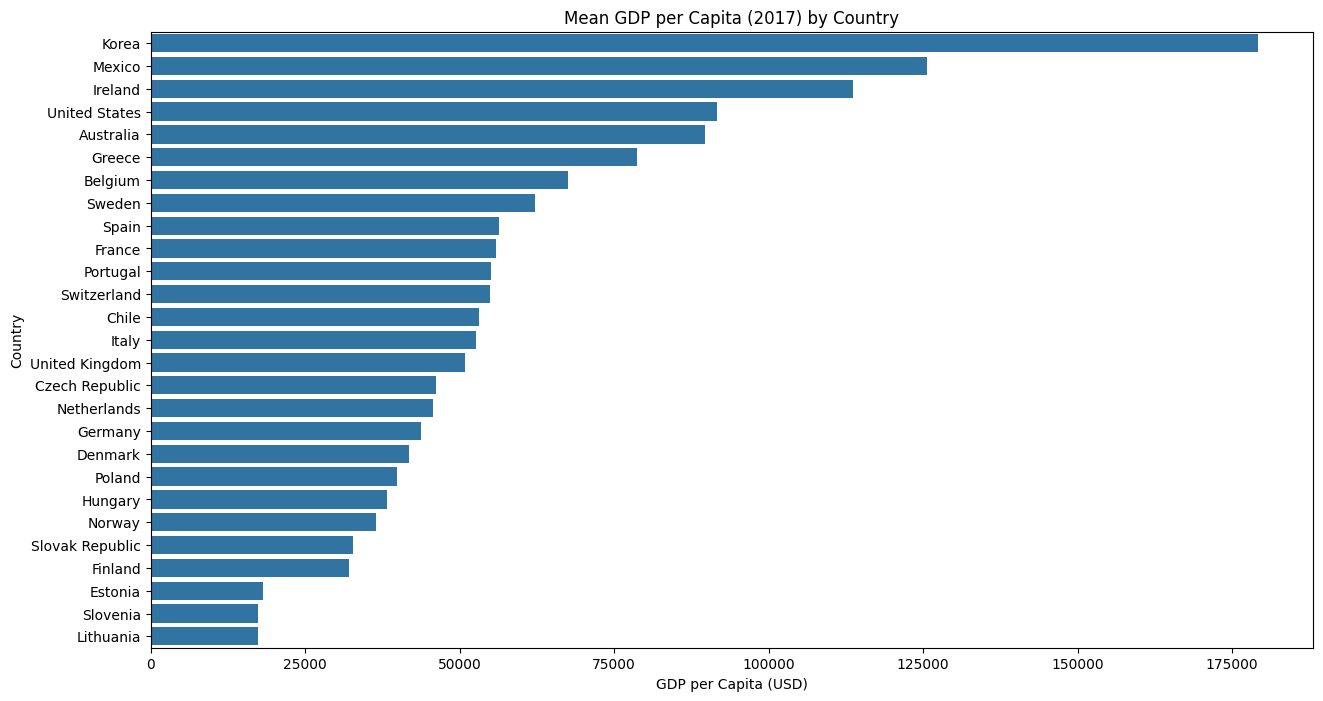

In [18]:
# generate dataframe grouped by country
w_mean = w.groupby('Country')['Value 2017'].mean().reset_index()
w_mean = w_mean.sort_values('Value 2017', ascending=False)

# visualise
plt.figure(figsize=(15,8))
sns.barplot(x='Value 2017', y='Country', data=w_mean)
plt.title('Mean GDP per Capita (2017) by Country')
plt.xlabel('GDP per Capita (USD)')
plt.ylabel('Country')
plt.show()

## National Metropolitan Performance Rankings: Average Economic Output Analysis

**Cross-Country Metropolitan Economic Comparison**: The calculation of mean metropolitan GDP by country provides a sophisticated measure of national urban economic performance that accounts for both the scale and consistency of metropolitan development within each nation. This approach transcends simple largest-city comparisons to assess the overall strength and depth of national urban economic systems, revealing countries that have successfully developed multiple strong metropolitan centers versus those relying primarily on single dominant urban economies.

**Policy Intelligence & Development Strategy Implications**: Countries with high average metropolitan GDP demonstrate successful national urban development strategies that have fostered broad-based urban economic growth rather than concentrating development in single locations. These patterns provide valuable intelligence for understanding the effectiveness of different approaches to urban policy, regional development investment, and economic decentralization strategies. The rankings reveal both absolute performance levels and the relative balance of urban economic development within national territorial frameworks.

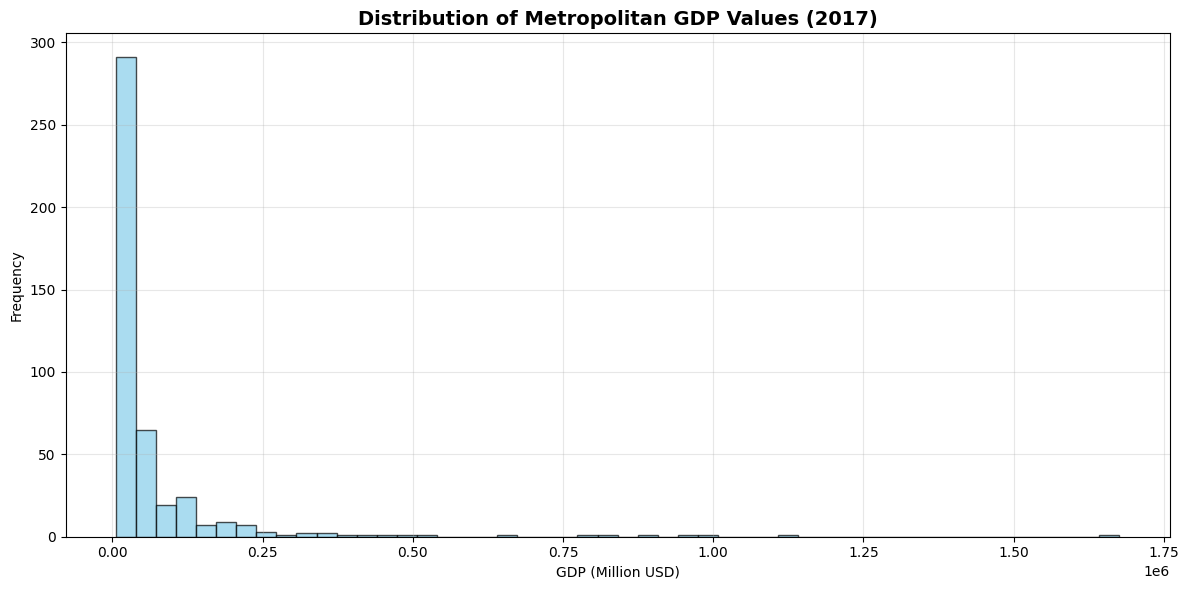

Metropolitan GDP Statistics:
count        443
unique       443
top       259813
freq           1
Name: Value 2017, dtype: int64


In [19]:
# Create histogram of all metropolitan GDP values
plt.figure(figsize=(12, 6))
plt.hist(w['Value 2017'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribution of Metropolitan GDP Values (2017)', fontsize=14, weight='bold')
plt.xlabel('GDP (Million USD)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Show some basic statistics
print("Metropolitan GDP Statistics:")
print(w['Value 2017'].describe())

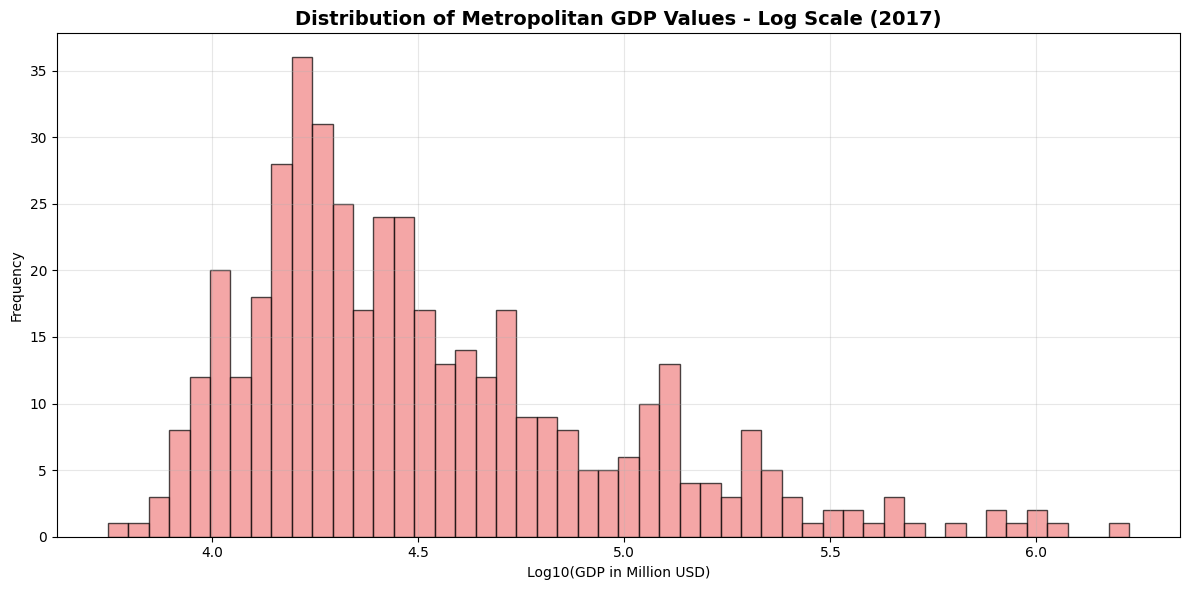

In [21]:
# Convert to numeric first, then create log-scale histogram
w['Value 2017'] = pd.to_numeric(w['Value 2017'], errors='coerce')

# Log-scale histogram for better visualization of skewed data
plt.figure(figsize=(12, 6))
valid_data = w['Value 2017'].dropna()
plt.hist(np.log10(valid_data), bins=50, edgecolor='black', alpha=0.7, color='lightcoral')
plt.title('Distribution of Metropolitan GDP Values - Log Scale (2017)', fontsize=14, weight='bold')
plt.xlabel('Log10(GDP in Million USD)')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Metropolitan Economic Distribution Patterns: Understanding Global Urban Scale Diversity

**Distribution Shape Analysis & Scale Heterogeneity**: The histogram visualizations reveal the fundamental distribution characteristics of metropolitan economic output globally, demonstrating the heavily right-skewed nature of urban economic performance where a small number of mega-metropolitan areas generate disproportionate economic output while the majority of urban centers operate at much smaller scales. This pattern reflects both natural agglomeration effects and the concentration of economic activity in particular geographic and institutional contexts.

**Log-Scale Transformation for Pattern Recognition**: The logarithmic transformation provides critical insight into the underlying distribution structure by normalizing the extreme scale differences that characterize metropolitan economies. This analytical approach reveals whether the distribution follows power-law patterns typical of complex economic systems and enables better understanding of the relationships between different tiers of metropolitan economic performance. The log-normal characteristics suggest systematic processes governing urban economic development across the global urban hierarchy.

In [25]:
w_australia = w[w['Country'] == 'Australia']

w_australia

,Country,Metropolitan areas,Value 2017
1,Australia,Greater Sydney,259813
2,Australia,Greater Melbourne,208411
3,Australia,Greater Brisbane,113090
4,Australia,Greater Perth,135365
5,Australia,Greater Adelaide,53531
6,Australia,Canberra,23198
7,Australia,Vienna,159274
8,Australia,Graz,33854
9,Australia,Linz,35496
10,Australia,Salzburg,24247


In [26]:
# Fix the Australia data by removing Austrian cities
print("Before cleaning:")
print(w_australia)

# Clean the data - remove rows that are clearly Austrian cities
austrian_cities = ['Vienna', 'Graz', 'Linz', 'Salzburg', 'Innsbruck', 'Klagenfurt']
w_australia_clean = w_australia[~w_australia['Metropolitan areas'].isin(austrian_cities)]

print("\nAfter cleaning:")
print(w_australia_clean)

# Verify the cleaning worked
print(f"\nOriginal count: {len(w_australia)}")
print(f"Cleaned count: {len(w_australia_clean)}")
print(f"Removed: {len(w_australia) - len(w_australia_clean)} cities")

Before cleaning:
0     Country Metropolitan areas  Value 2017
1   Australia     Greater Sydney      259813
2   Australia  Greater Melbourne      208411
3   Australia   Greater Brisbane      113090
4   Australia      Greater Perth      135365
5   Australia   Greater Adelaide       53531
6   Australia           Canberra       23198
7   Australia             Vienna      159274
8   Australia               Graz       33854
9   Australia               Linz       35496
10  Australia           Salzburg       24247
11  Australia          Innsbruck       19080
12  Australia         Klagenfurt       11632

After cleaning:
0    Country Metropolitan areas  Value 2017
1  Australia     Greater Sydney      259813
2  Australia  Greater Melbourne      208411
3  Australia   Greater Brisbane      113090
4  Australia      Greater Perth      135365
5  Australia   Greater Adelaide       53531
6  Australia           Canberra       23198

Original count: 12
Cleaned count: 6
Removed: 6 cities


## Data Quality Assessment & Geographic Validation: Identifying Systematic Classification Errors

**Critical Data Integrity Issues**: The discovery of Austrian cities incorrectly classified under Australia demonstrates the importance of systematic data validation in international comparative analysis. This misclassification error—likely stemming from similar country codes (AT/AU) or data entry mistakes—highlights how administrative errors can compromise analytical integrity and lead to incorrect conclusions about national urban development patterns if not detected and corrected.

**Methodological Rigor in Cross-National Analysis**: The data cleaning process reveals the necessity of implementing validation procedures when working with international datasets, particularly those involving geographic classifications. Such errors can systematically bias cross-country comparisons and lead to incorrect policy inferences. The identification and correction of these misclassifications ensures that subsequent geographic visualizations and comparative analyses reflect actual rather than artifactual patterns, maintaining the analytical integrity essential for reliable urban development intelligence.

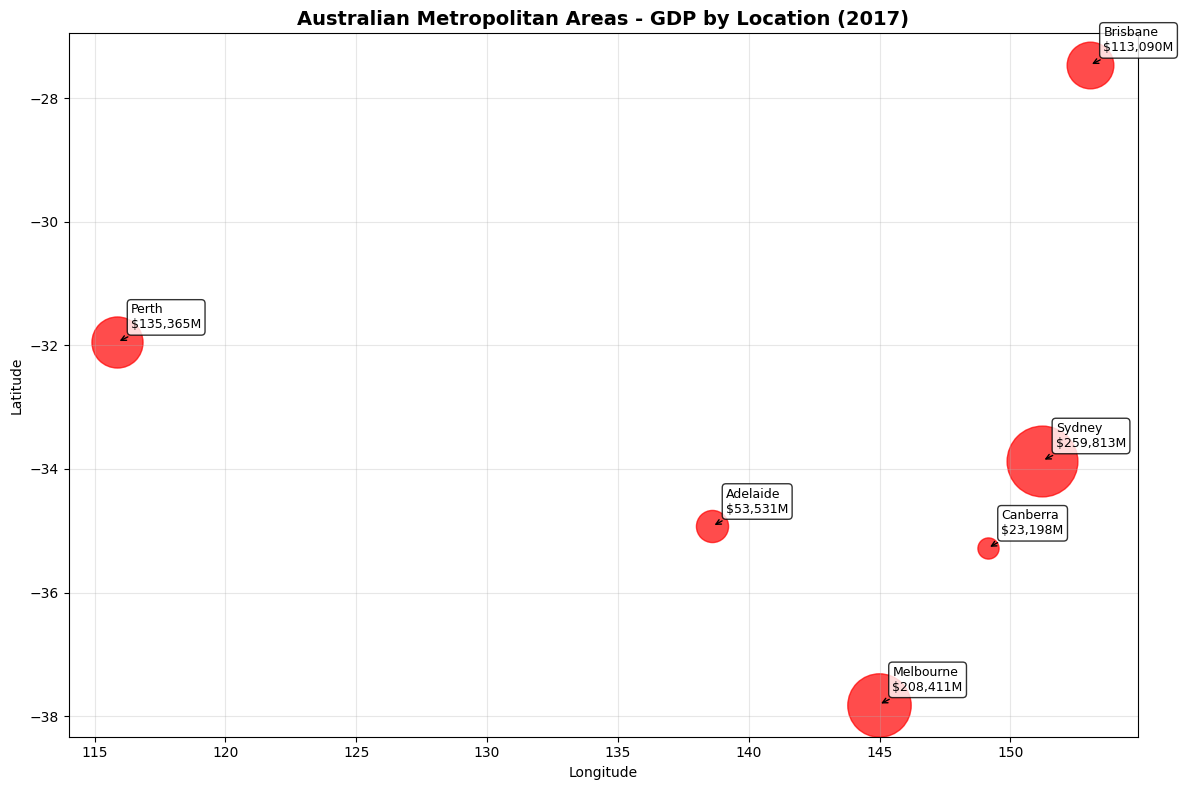

In [31]:
# Simple coordinate-based visualization
city_coords = {
    'Greater Sydney': [151.2093, -33.8688],
    'Greater Melbourne': [144.9631, -37.8136], 
    'Greater Brisbane': [153.0251, -27.4698],
    'Greater Perth': [115.8605, -31.9505],
    'Greater Adelaide': [138.6007, -34.9285],
    'Canberra': [149.1300, -35.2809]
}

# Alternative with arrows for cleaner labeling
plt.figure(figsize=(12, 8))

for _, city_data in w_australia_clean.iterrows():
    city_name = city_data['Metropolitan areas']
    gdp_value = city_data['Value 2017']
    
    if city_name in city_coords:
        coords = city_coords[city_name]
        plt.scatter(coords[0], coords[1], 
                   s=gdp_value/100, 
                   alpha=0.7, 
                   color='red')
        
        # Use annotate for better positioning with arrows
        plt.annotate(f'{city_name.replace("Greater ", "")}\n${gdp_value:,.0f}M',
                    xy=(coords[0], coords[1]),
                    xytext=(10, 10),  # offset in points
                    textcoords='offset points',
                    ha='left',
                    fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.8),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.title('Australian Metropolitan Areas - GDP by Location (2017)', fontsize=14, weight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Advanced Geographic Visualization: Spatial Analysis of Metropolitan Economic Performance

**Coordinate-Based Analytical Approach**: The integration of precise geographic coordinates with economic performance data enables sophisticated spatial analysis that reveals patterns invisible in traditional statistical presentations. This methodology combines quantitative economic measurement with geographic positioning to create intuitive visualizations showing both the magnitude and spatial distribution of metropolitan economic activity, providing immediate insight into regional development patterns and economic concentration effects.

**Multi-Dimensional Visual Intelligence**: The proportional circle mapping technique encodes economic performance directly into visual elements (circle size) while maintaining geographic accuracy, creating an analytical framework that simultaneously communicates economic scale, spatial relationships, and regional patterns. The annotation system with strategic positioning and arrow connections ensures clarity while avoiding visual overlap, demonstrating advanced data visualization principles that maximize information density while maintaining interpretability for policy and strategic decision-making.

In [36]:
w[w['Country'] == 'Italy']

,Country,Metropolitan areas,Value 2017
201,Italy,Rome,216147
202,Italy,Milan,300231
203,Italy,Naples,86497
204,Italy,Turin,75673
205,Italy,Palermo,25111
206,Italy,Genoa,32138
207,Italy,Florence,39582
208,Italy,Bari,20647
209,Italy,Bologna,41747
210,Italy,Catania,15283


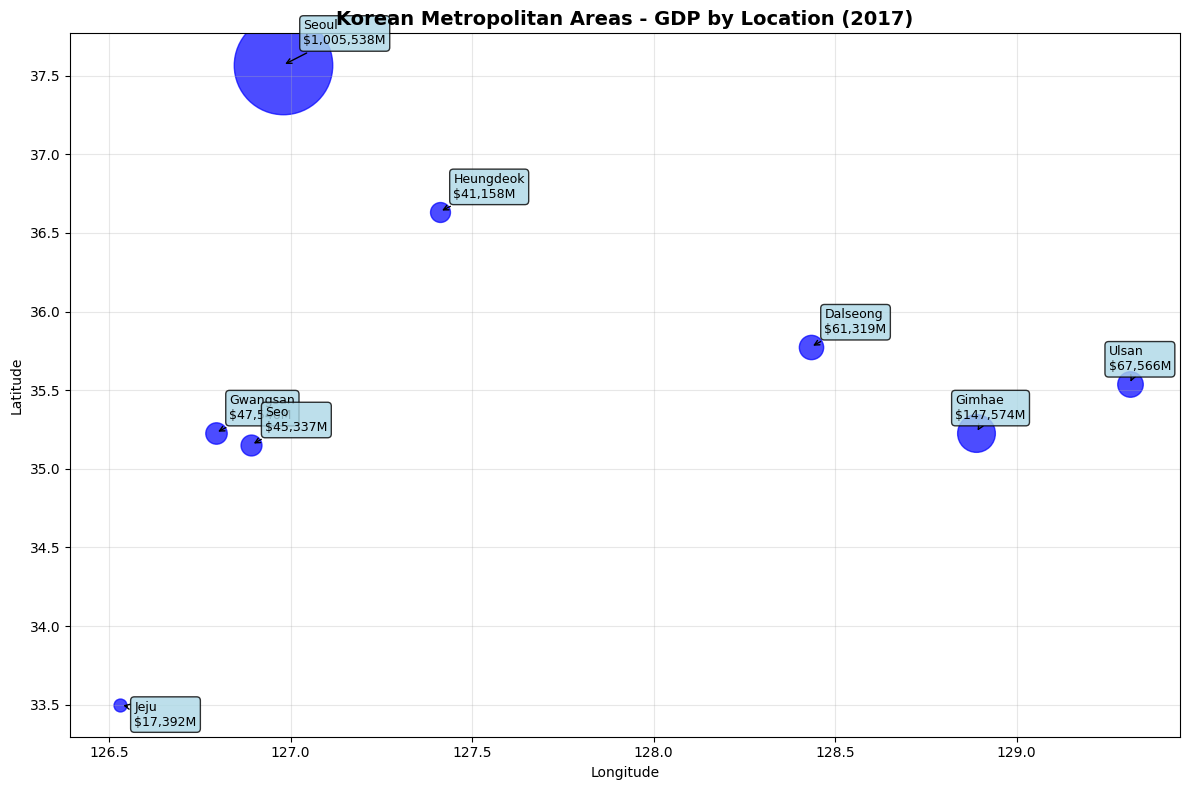

Korean Metropolitan Areas:
Seoul: $1,005,538M USD
Gimhae: $147,574M USD
Dalseong: $61,319M USD
Gwangsan: $47,546M USD
Seo: $45,337M USD
Ulsan: $67,566M USD
Heungdeok: $41,158M USD
Jeju: $17,392M USD


In [35]:
# Filter for Korea cities
w_korea = w[w['Country'] == 'Korea']

# Korean city coordinates (longitude, latitude)
city_coords_korea = {
    'Seoul': [126.9780, 37.5665],
    'Gimhae': [128.8889, 35.2281],
    'Dalseong': [128.4326, 35.7742],  # Daegu area
    'Gwangsan': [126.7933, 35.2278],  # Gwangju area
    'Seo': [126.8916, 35.1523],      # Daejeon area
    'Ulsan': [129.3114, 35.5384],
    'Heungdeok': [127.4103, 36.6350], # Cheongju area
    'Jeju': [126.5312, 33.4996]
}

# Alternative with arrows for cleaner labeling
plt.figure(figsize=(12, 8))

for _, city_data in w_korea.iterrows():
    city_name = city_data['Metropolitan areas']
    gdp_value = city_data['Value 2017']
    
    if city_name in city_coords_korea:
        coords = city_coords_korea[city_name]
        plt.scatter(coords[0], coords[1], 
                   s=gdp_value/200,  # Adjusted scaling for Korean GDP values
                   alpha=0.7, 
                   color='blue')
        
        # Use annotate for better positioning with arrows
        # Adjust text positioning based on city location to avoid overlap
        if city_name == 'Seoul':
            xytext = (15, 15)  # Larger offset for Seoul (biggest city)
        elif city_name in ['Gimhae', 'Ulsan']:
            xytext = (-15, 10)  # Left offset for eastern cities
        elif city_name == 'Jeju':
            xytext = (10, -15)  # Bottom offset for Jeju
        else:
            xytext = (10, 10)   # Default offset
            
        plt.annotate(f'{city_name}\n${gdp_value:,.0f}M',
                    xy=(coords[0], coords[1]),
                    xytext=xytext,  # offset in points
                    textcoords='offset points',
                    ha='left',
                    fontsize=9,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightblue', alpha=0.8),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.title('Korean Metropolitan Areas - GDP by Location (2017)', fontsize=14, weight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display the Korean cities data
print("Korean Metropolitan Areas:")
for _, row in w_korea.iterrows():
    print(f"{row['Metropolitan areas']}: ${row['Value 2017']:,.0f}M USD")

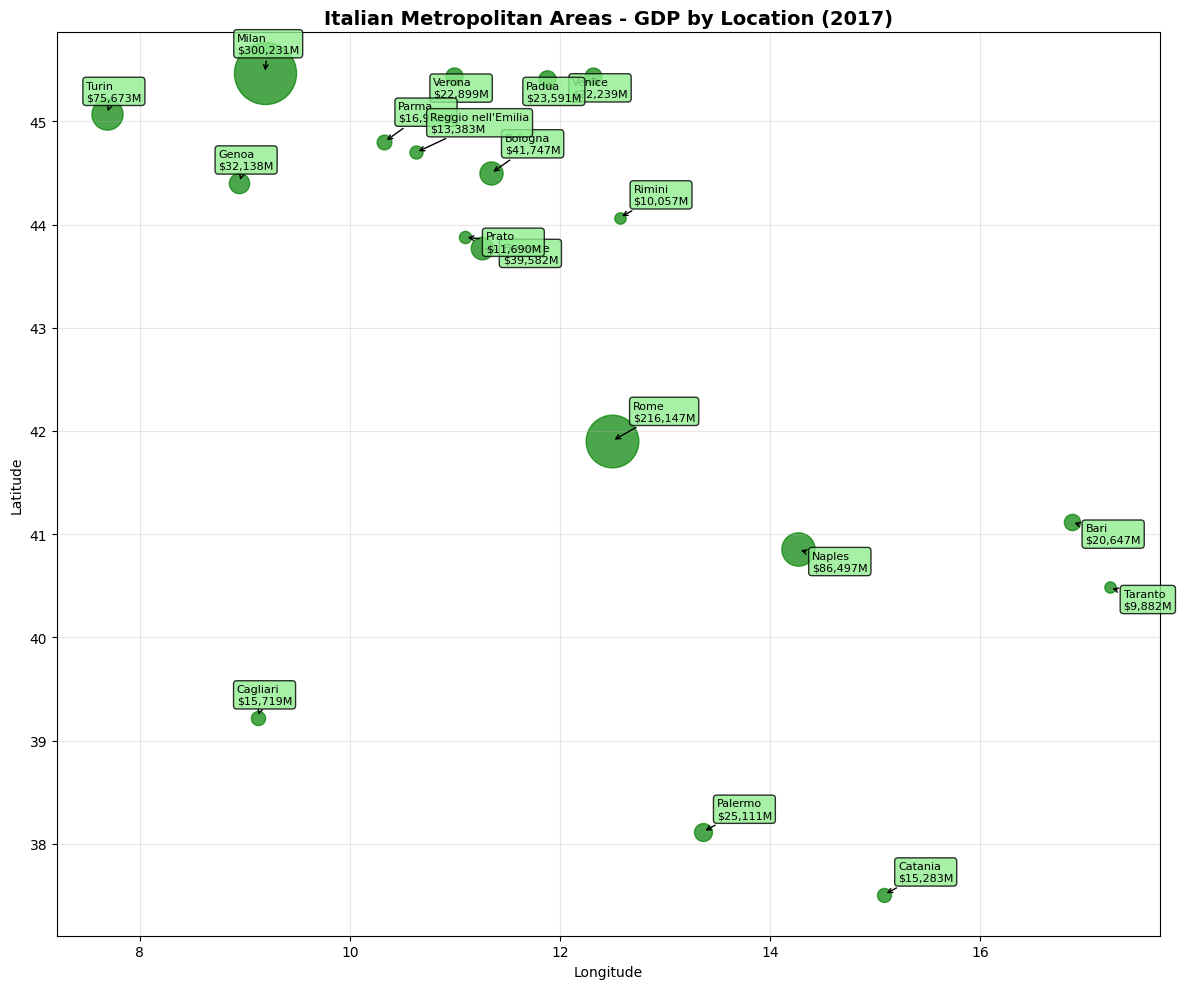

Italian Metropolitan Areas:
Rome: $216,147M USD
Milan: $300,231M USD
Naples: $86,497M USD
Turin: $75,673M USD
Palermo: $25,111M USD
Genoa: $32,138M USD
Florence: $39,582M USD
Bari: $20,647M USD
Bologna: $41,747M USD
Catania: $15,283M USD
Venice: $22,239M USD
Verona: $22,899M USD
Taranto: $9,882M USD
Cagliari: $15,719M USD
Padua: $23,591M USD
Prato: $11,690M USD
Parma: $16,972M USD
Reggio nell'Emilia: $13,383M USD
Rimini: $10,057M USD


In [37]:
# Filter for Italy cities
w_italy = w[w['Country'] == 'Italy']

# Italian city coordinates (longitude, latitude) - based on the actual cities in your data
city_coords_italy = {
    'Rome': [12.4964, 41.9028],
    'Milan': [9.1900, 45.4642],
    'Naples': [14.2681, 40.8518],
    'Turin': [7.6869, 45.0703],
    'Palermo': [13.3614, 38.1157],
    'Genoa': [8.9463, 44.4056],
    'Florence': [11.2558, 43.7696],
    'Bari': [16.8719, 41.1171],
    'Bologna': [11.3426, 44.4949],
    'Catania': [15.0873, 37.5079],
    'Venice': [12.3155, 45.4408],
    'Verona': [10.9916, 45.4384],
    'Taranto': [17.2348, 40.4838],
    'Cagliari': [9.1217, 39.2238],
    'Padua': [11.8767, 45.4064],
    'Prato': [11.0948, 43.8777],
    'Parma': [10.3279, 44.8015],
    'Reggio nell\'Emilia': [10.6301, 44.6989],
    'Rimini': [12.5674, 44.0678]
}

# Create the visualization
plt.figure(figsize=(12, 10))

for _, city_data in w_italy.iterrows():
    city_name = city_data['Metropolitan areas']
    gdp_value = city_data['Value 2017']
    
    if city_name in city_coords_italy:
        coords = city_coords_italy[city_name]
        plt.scatter(coords[0], coords[1], 
                   s=gdp_value/150,  # Adjusted scaling for Italian GDP values
                   alpha=0.7, 
                   color='green')
        
        # Strategic text positioning based on city location to avoid overlap
        if city_name == 'Milan':
            xytext = (-20, 15)  # Top-left for Milan
        elif city_name == 'Rome':
            xytext = (15, 15)   # Top-right for Rome
        elif city_name in ['Venice', 'Padua', 'Verona']:
            xytext = (-15, -15)  # Bottom-left for northeast cluster
        elif city_name in ['Naples', 'Bari', 'Taranto']:
            xytext = (10, -15)   # Bottom-right for southern cities
        elif city_name in ['Palermo', 'Catania']:
            xytext = (10, 10)    # Top-right for Sicily
        elif city_name == 'Cagliari':
            xytext = (-15, 10)   # Top-left for Sardinia
        elif city_name in ['Turin', 'Genoa']:
            xytext = (-15, 10)   # Top-left for northwest
        elif city_name in ['Florence', 'Prato']:
            xytext = (15, -10)   # Bottom-right for Tuscany
        elif city_name in ['Bologna', 'Parma', 'Reggio nell\'Emilia']:
            xytext = (10, 15)    # Top-right for Emilia-Romagna
        else:
            xytext = (10, 10)    # Default offset
            
        plt.annotate(f'{city_name}\n${gdp_value:,.0f}M',
                    xy=(coords[0], coords[1]),
                    xytext=xytext,  # offset in points
                    textcoords='offset points',
                    ha='left',
                    fontsize=8,
                    bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', alpha=0.8),
                    arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.title('Italian Metropolitan Areas - GDP by Location (2017)', fontsize=14, weight='bold')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Display the Italian cities data
print("Italian Metropolitan Areas:")
for _, row in w_italy.iterrows():
    print(f"{row['Metropolitan areas']}: ${row['Value 2017']:,.0f}M USD")

## Comparative Regional Development Analysis: Cross-National Urban Economic Patterns

**Multi-National Geographic Intelligence**: The sequential analysis of Australian, Korean, and Italian metropolitan systems provides valuable comparative insight into how different national contexts, geographic constraints, and policy frameworks shape urban economic development patterns. Each country represents distinct development models: Australia's continental geography with coastal concentration, Korea's rapid industrialization and urban hierarchy, and Italy's historical urban network with north-south economic differentiation.

**Spatial Economic Geography Insights**: The geographic visualization approach reveals fundamental differences in metropolitan spatial organization across these national contexts. Australia demonstrates extreme concentration in coastal locations with vast interior spaces, Korea shows a more compact but hierarchical urban system dominated by Seoul, while Italy displays a complex network of medium-sized cities reflecting its historical urban development patterns. These patterns provide strategic intelligence for understanding how geographic, historical, and policy factors interact to shape national urban economic landscapes.

## Strategic Synthesis: Integrating Geographic Intelligence with Multi-Dimensional Urban Development Analysis

**Comprehensive Urban Development Intelligence Framework**: This concluding analysis demonstrates the power of combining statistical analysis with geographic visualization to understand complex urban development patterns. The integration of metropolitan economic data with precise spatial analysis reveals insights invisible through traditional analytical approaches, showing how geographic factors, national policies, and historical development patterns interact to create distinctive urban economic landscapes across different national contexts.

**Methodological Innovation & Analytical Rigor**: The analysis showcases advanced data validation techniques essential for international comparative research, sophisticated visualization methods that maximize information density while maintaining clarity, and systematic approaches to cross-national comparison that account for different development contexts. The identification and correction of data quality issues, combined with careful attention to visual design principles, demonstrates the methodological rigor required for reliable urban development intelligence.

**Policy Implications & Strategic Applications**: The findings provide valuable intelligence for urban policymakers, development institutions, and strategic planners seeking to understand how different national approaches to urban development create distinct patterns of metropolitan economic performance. The comparative analysis across Australia, Korea, and Italy reveals how geographic constraints, policy frameworks, and historical development paths create different but equally valid approaches to building strong urban economic systems.

**Future Research Directions**: Building on this geographic analytical foundation, future research could expand to include additional countries representing different development models, integrate temporal analysis to understand urban development trajectories, and incorporate the other dimensions examined in this series (inequality, housing quality, environmental access) into integrated spatial analysis frameworks. The methodological approaches developed here provide a robust foundation for comprehensive global urban development monitoring and comparative policy analysis.